## EDA

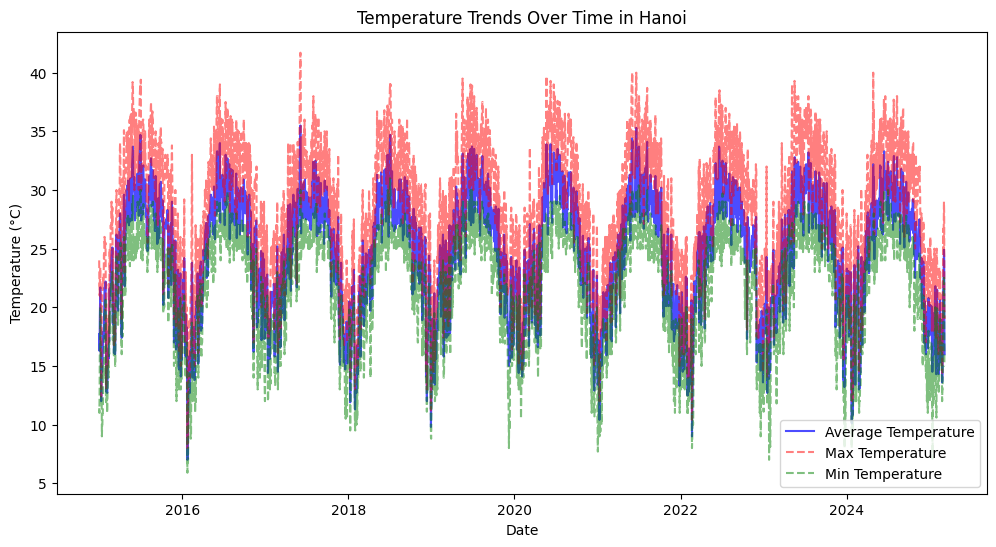

                  datetime      tempmax      tempmin         temp  \
count                 3719  3719.000000  3719.000000  3719.000000   
mean   2020-02-03 00:00:00    28.312181    21.819172    24.749987   
min    2015-01-01 00:00:00     8.000000     5.900000     7.000000   
25%    2017-07-18 12:00:00    24.000000    18.000000    20.800000   
50%    2020-02-03 00:00:00    29.100000    23.000000    25.900000   
75%    2022-08-20 12:00:00    33.000000    26.000000    28.900000   
max    2025-03-07 00:00:00    41.700000    31.000000    35.500000   
std                    NaN     5.881274     4.915270     5.182187   

       feelslikemax  feelslikemin    feelslike          dew     humidity  \
count   3719.000000   3719.000000  3719.000000  3719.000000  3719.000000   
mean      32.229390     22.584378    27.158833    20.307179    78.119548   
min        8.000000      2.100000     4.600000    -2.100000    31.100000   
25%       24.000000     18.000000    20.800000    16.600000    71.700000  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/kaggle/input/hanoi-weather-data/hanoi 2015-01-01 to 2025-07-03.csv')
# Convert datetime column to proper format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Summary statistics
summary_stats = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Visualize temperature trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['temp'], label="Average Temperature", color='blue', alpha=0.7)
plt.plot(df['datetime'], df['tempmax'], label="Max Temperature", color='red', linestyle='dashed', alpha=0.5)
plt.plot(df['datetime'], df['tempmin'], label="Min Temperature", color='green', linestyle='dashed', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time in Hanoi")
plt.legend()
plt.show()

# Display summary statistics and missing values
print(summary_stats)
print(missing_values)



In [2]:
# Handling missing values

# Checking unique values in 'preciptype' and 'severerisk' before deciding on imputation
unique_preciptype = df['preciptype'].unique()
unique_severerisk = df['severerisk'].unique()

# Filling missing 'preciptype' with 'No Precipitation' (assuming missing means no event)
df['preciptype'].fillna('No Precipitation', inplace=True)

# Filling missing 'severerisk' with 0 (assuming no severe risk if missing)
df['severerisk'].fillna(0, inplace=True)

# Verify if all missing values are handled
missing_values_after = df.isnull().sum()
missing_values_after

<ipython-input-2-344a472f078b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['preciptype'].fillna('No Precipitation', inplace=True)
<ipython-input-2-344a472f078b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [3]:
import numpy as np

# Using IQR method to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Selecting key numerical columns for outlier detection
numerical_columns = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windspeed', 'sealevelpressure']

# Storing outliers in a dictionary
outliers_dict = {col: detect_outliers(df, col) for col in numerical_columns}

# Counting the number of outliers per column
outliers_count = {col: len(outliers_dict[col]) for col in numerical_columns}

# Displaying the outliers count
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Feature', 'Number of Outliers'])
outliers_df


Feature  Number of Outliers
0           tempmax                   3
1           tempmin                   1
2              temp                   2
3          humidity                  74
4            precip                 616
5         windspeed                  52
6  sealevelpressure                   1

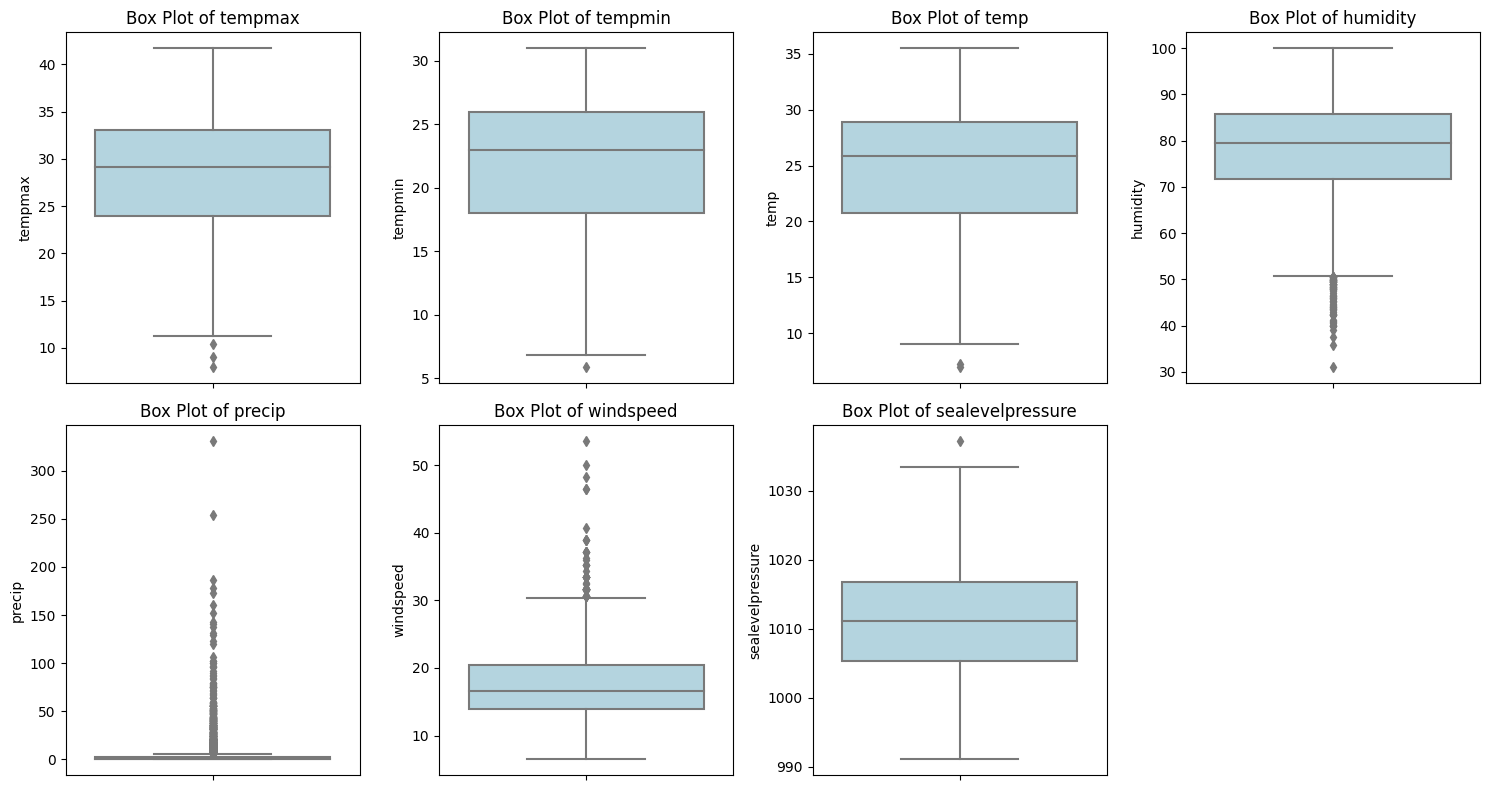

In [4]:
import seaborn as sns

# Create box plots for numerical features with detected outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


### Resampling and Converting Frequencies

The primary difference between the resample and asfreq is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection. at each point, resample reports the average of the previous mont, while asfreq reports the value at the end of the month.

<ipython-input-5-a02ec3b0d7fb>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["temp"].asfreq('M').plot(label="asfreq (End of Month)")
<ipython-input-5-a02ec3b0d7fb>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["temp"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
<ipython-input-5-a02ec3b0d7fb>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["temp"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")


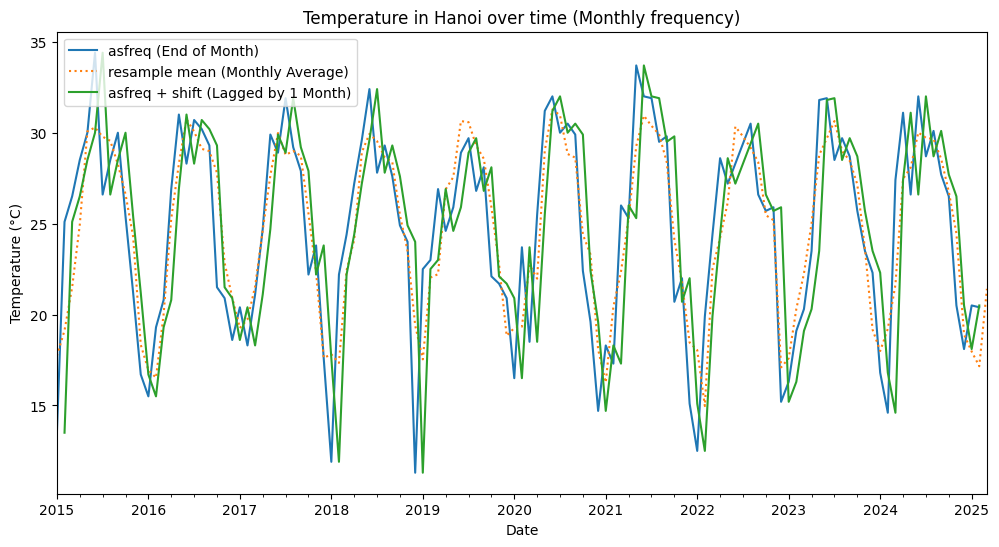

In [5]:
# Resampling and Converting Frequencies for Hanoi Weather Data

# Set figure width and height
plt.rcParams["figure.figsize"] = [12, 6]

# Ensure datetime is set as index for resampling
df.set_index('datetime', inplace=True)

# Plot temperature trends using asfreq and resample
df["temp"].asfreq('M').plot(label="asfreq (End of Month)")
df["temp"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
df["temp"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")

# Formatting the plot
plt.title('Temperature in Hanoi over time (Monthly frequency)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


<ipython-input-6-23dafb846f3c>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["sealevelpressure"].asfreq('M').plot(label="asfreq (End of Month)")
<ipython-input-6-23dafb846f3c>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["sealevelpressure"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
<ipython-input-6-23dafb846f3c>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["sealevelpressure"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")


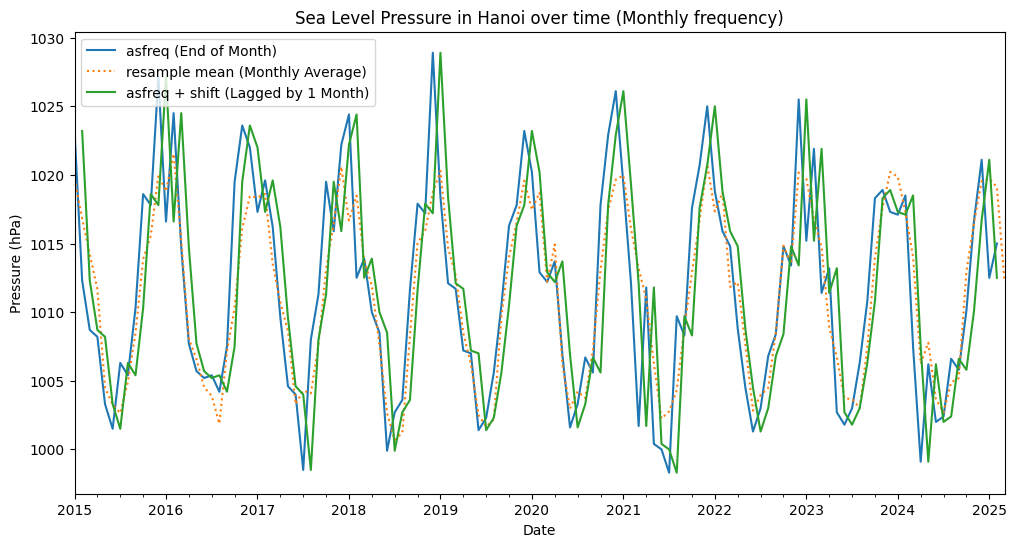

In [6]:
# Resampling and Converting Frequencies for Sea Level Pressure in Hanoi

# Set figure width and height
plt.rcParams["figure.figsize"] = [12, 6]

# Plot sea level pressure trends using asfreq and resample
df["sealevelpressure"].asfreq('M').plot(label="asfreq (End of Month)")
df["sealevelpressure"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
df["sealevelpressure"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")

# Formatting the plot
plt.title('Sea Level Pressure in Hanoi over time (Monthly frequency)')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


<ipython-input-7-37b90288f30d>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["humidity"].asfreq('M').plot(label="asfreq (End of Month)")
<ipython-input-7-37b90288f30d>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["humidity"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
<ipython-input-7-37b90288f30d>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["humidity"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")


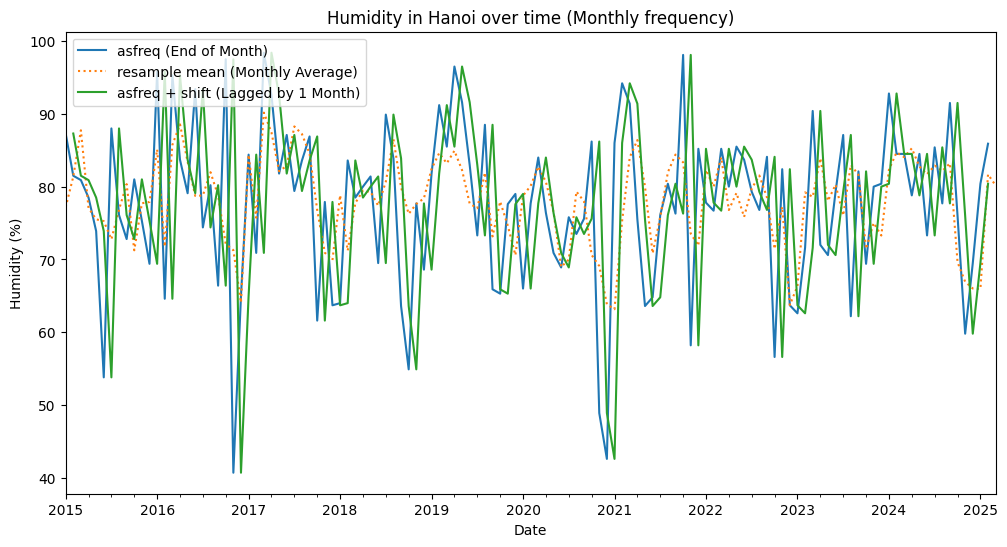

In [7]:
# Resampling and Converting Frequencies for Humidity in Hanoi

# Set figure width and height
plt.rcParams["figure.figsize"] = [12, 6]

# Plot humidity trends using asfreq and resample
df["humidity"].asfreq('M').plot(label="asfreq (End of Month)")
df["humidity"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
df["humidity"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")

# Formatting the plot
plt.title('Humidity in Hanoi over time (Monthly frequency)')
plt.ylabel('Humidity (%)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


<ipython-input-8-6b1bc3c9ebdb>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["windspeed"].asfreq('M').plot(label="asfreq (End of Month)")
<ipython-input-8-6b1bc3c9ebdb>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["windspeed"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
<ipython-input-8-6b1bc3c9ebdb>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["windspeed"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")


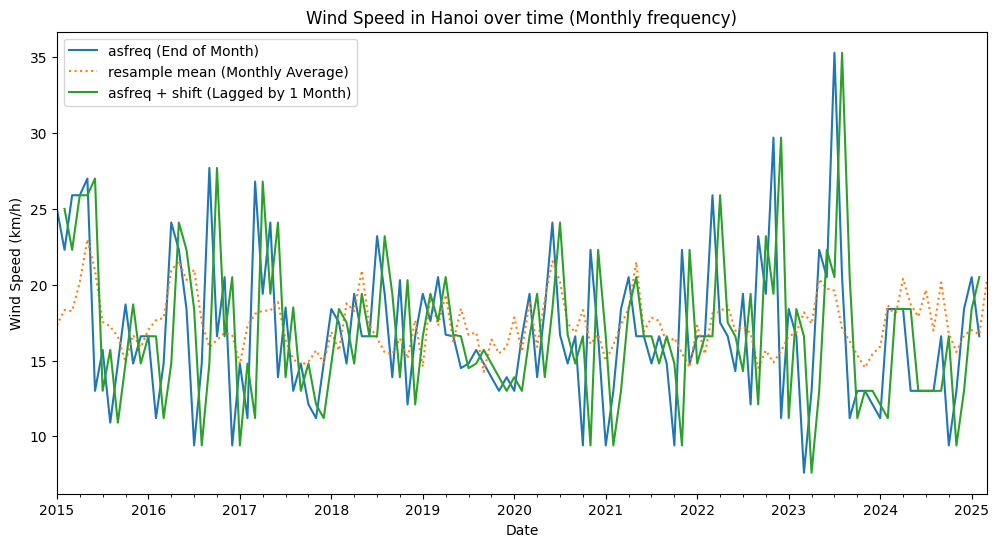

In [8]:
# Resampling and Converting Frequencies for Wind Speed in Hanoi

# Set figure width and height
plt.rcParams["figure.figsize"] = [12, 6]

# Plot wind speed trends using asfreq and resample
df["windspeed"].asfreq('M').plot(label="asfreq (End of Month)")
df["windspeed"].resample('M').mean().plot(style=':', label="resample mean (Monthly Average)")
df["windspeed"].asfreq('M').shift(1).plot(label="asfreq + shift (Lagged by 1 Month)")

# Formatting the plot
plt.title('Wind Speed in Hanoi over time (Monthly frequency)')
plt.ylabel('Wind Speed (km/h)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


### Time shifts
Pandas has two closely related methods for computing time shifts: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both shift() and tshift() by 12 months. We see here that shift(12) shifts the data by 12 months, while tshift(12) shifts the index values by 12 months.

<ipython-input-9-8e4e45925e43>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp = df["temp"].asfreq('M')
<ipython-input-9-8e4e45925e43>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp.shift(12, freq='M').plot(ax=ax[2], label="shift(12 months with freq)")


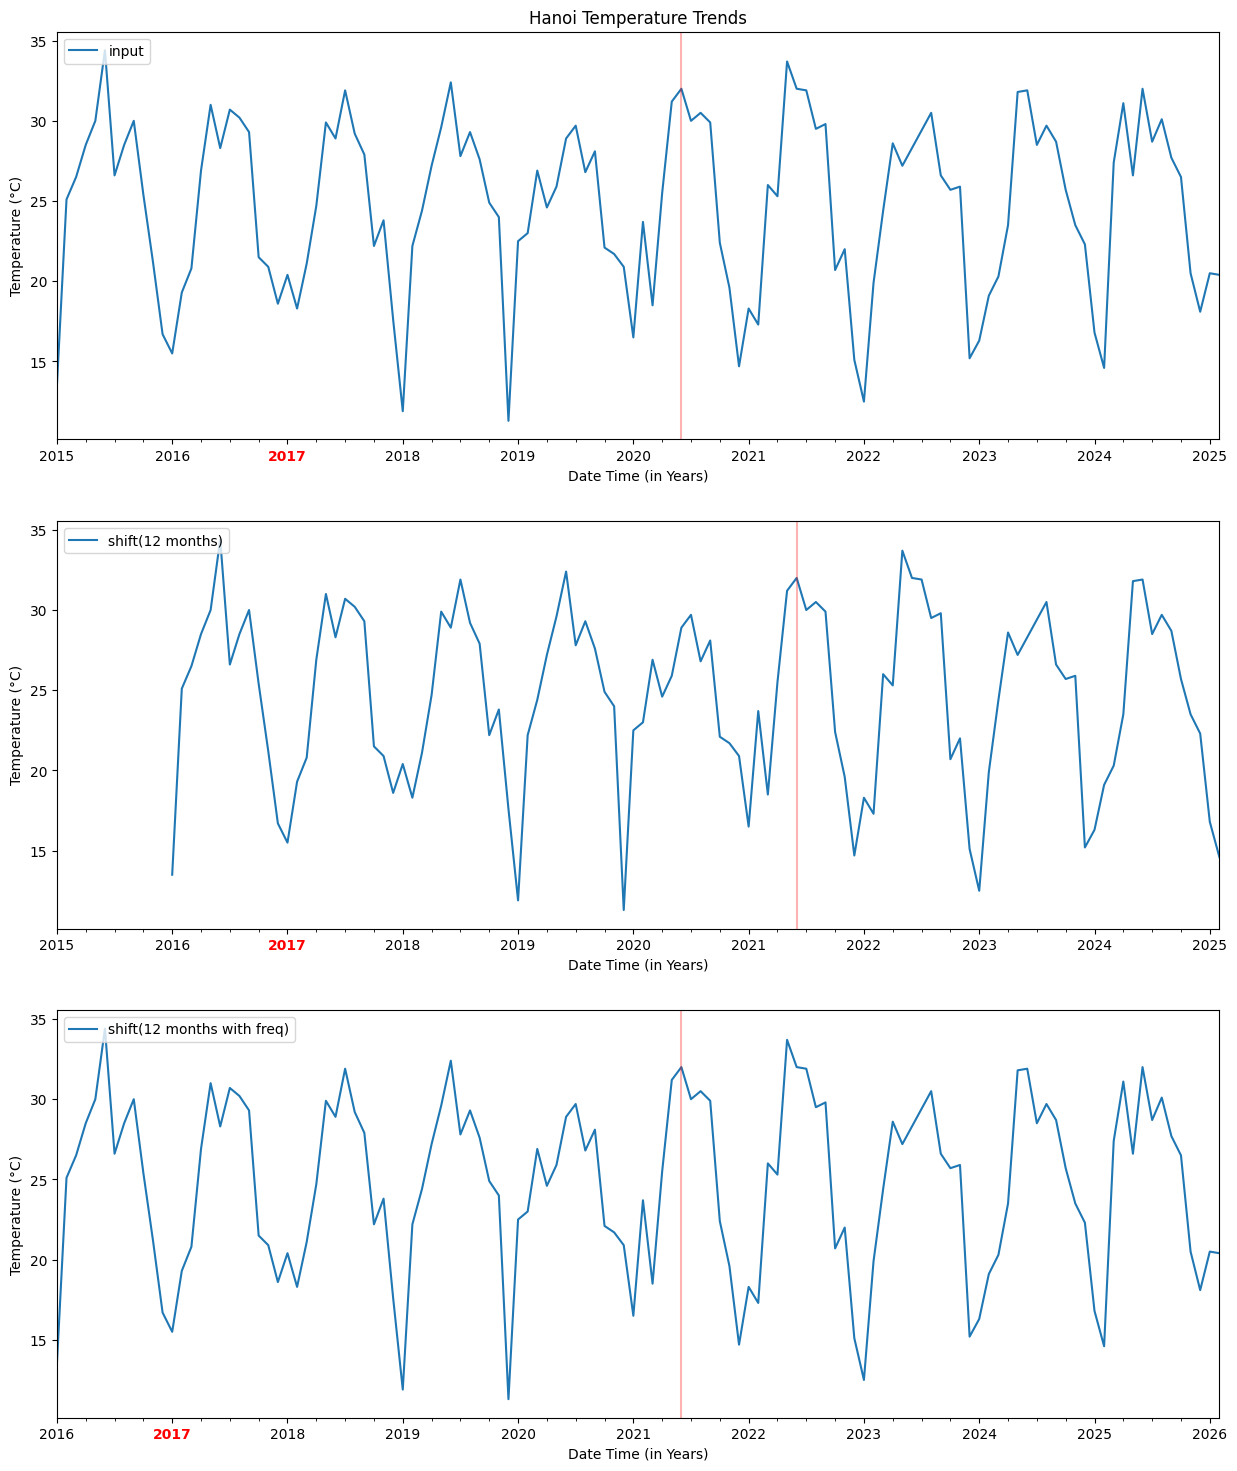

In [9]:
# Resampling and Shifting Temperature Data for Hanoi

plt.rcParams["figure.figsize"] = [15, 18]
fig, ax = plt.subplots(3, sharey=True)

# Apply a frequency to the data
temp = df["temp"].asfreq('M')

# Plot original, shifted, and time-shifted temperature data
temp.plot(ax=ax[0], label="input")
temp.shift(12).plot(ax=ax[1], label="shift(12 months)")
temp.shift(12, freq='M').plot(ax=ax[2], label="shift(12 months with freq)")

# Legends and annotations
local_max = pd.to_datetime('2020-06-30')
offset = pd.DateOffset(months=12)  # Corrected offset

ax[0].legend(loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[0].set_ylabel('Temperature (°C)')
ax[0].set_xlabel('Date Time (in Years)')
ax[0].set_title('Hanoi Temperature Trends')

ax[1].legend(loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[1].set_ylabel('Temperature (°C)')
ax[1].set_xlabel('Date Time (in Years)')

ax[2].legend(loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_xlabel('Date Time (in Years)')

plt.show()


### Rolling windows
Rolling statistics are another type of time series-specific operation implemented by Pandas. These can be accomplished via the rolling() attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation such as Aggregation and Grouping. This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of Hanoi Temperature:

The visuals of the plot show that rolling mean and rolling standard deviation are constant. Lets see below if we can see that in calculation also.

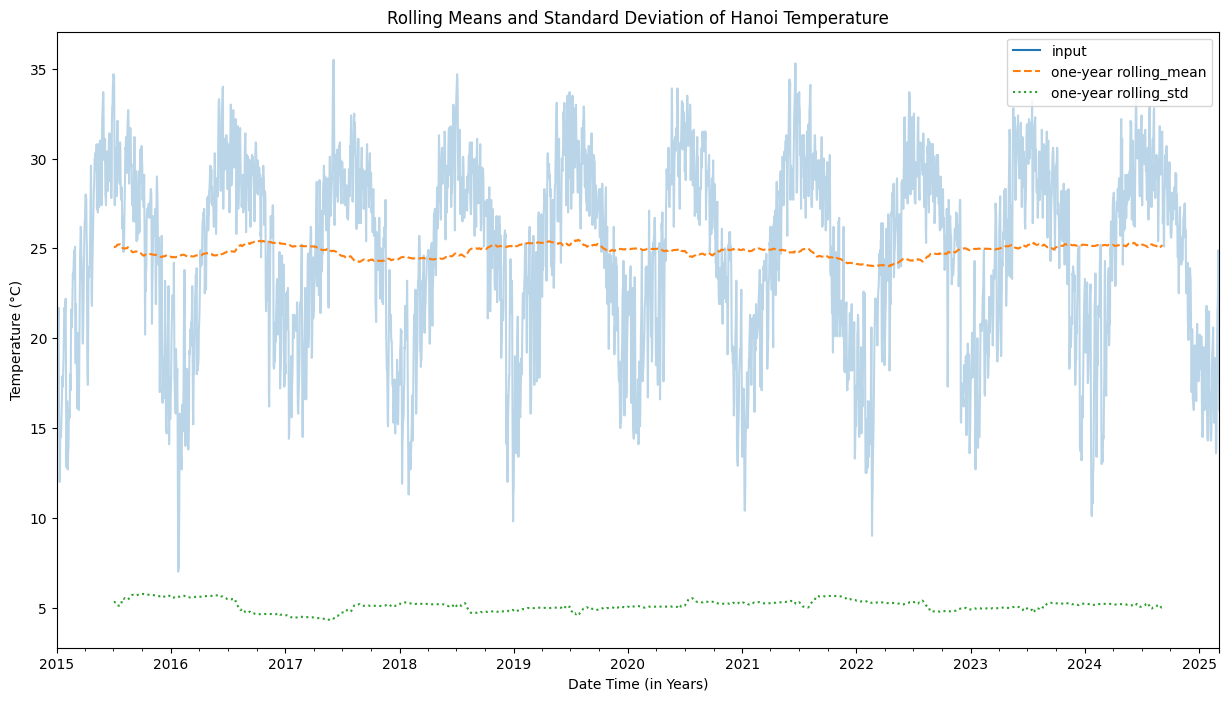

In [10]:
# Rolling Mean and Standard Deviation for Temperature in Hanoi

plt.rcParams["figure.figsize"] = [15, 8]

# Apply a rolling window of 365 days (1 year), centered
rolling = df["temp"].rolling(365, center=True)

# Create a DataFrame with input temperature, rolling mean, and rolling standard deviation
data = pd.DataFrame({
    'input': df["temp"],
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_std': rolling.std()
})

# Plot the data
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)  # Make input line more transparent
ax.set_title('Rolling Means and Standard Deviation of Hanoi Temperature')
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Date Time (in Years)')

plt.show()


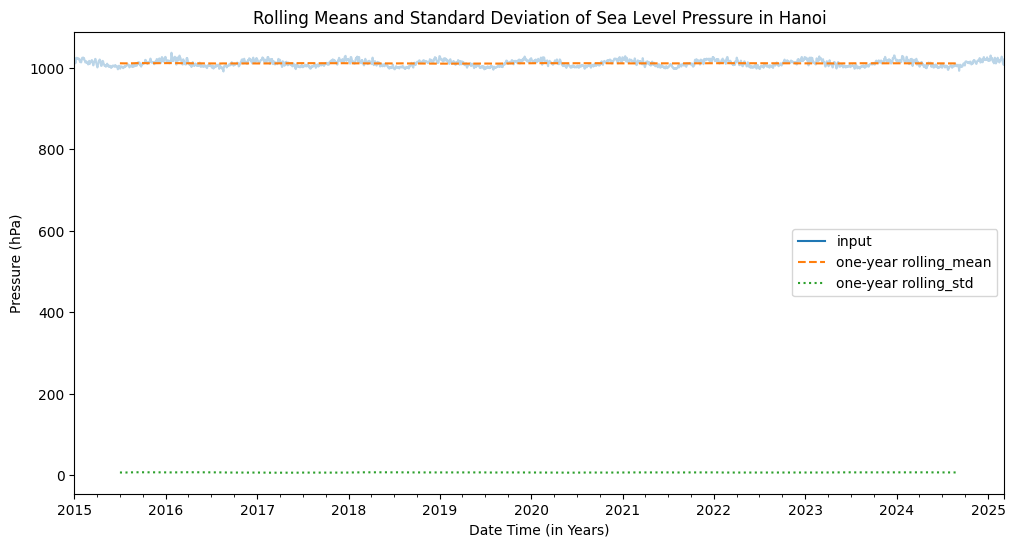

In [11]:
# Rolling Mean and Standard Deviation for Sea Level Pressure in Hanoi

plt.rcParams["figure.figsize"] = [12, 6]

# Apply a rolling window of 365 days (1 year), centered
rolling = df["sealevelpressure"].rolling(365, center=True)

# Create a DataFrame with input pressure, rolling mean, and rolling standard deviation
data = pd.DataFrame({
    'input': df["sealevelpressure"],
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_std': rolling.std()
})

# Plot the data
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)  # Make input line more transparent
ax.set_title('Rolling Means and Standard Deviation of Sea Level Pressure in Hanoi')
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Date Time (in Years)')

plt.show()


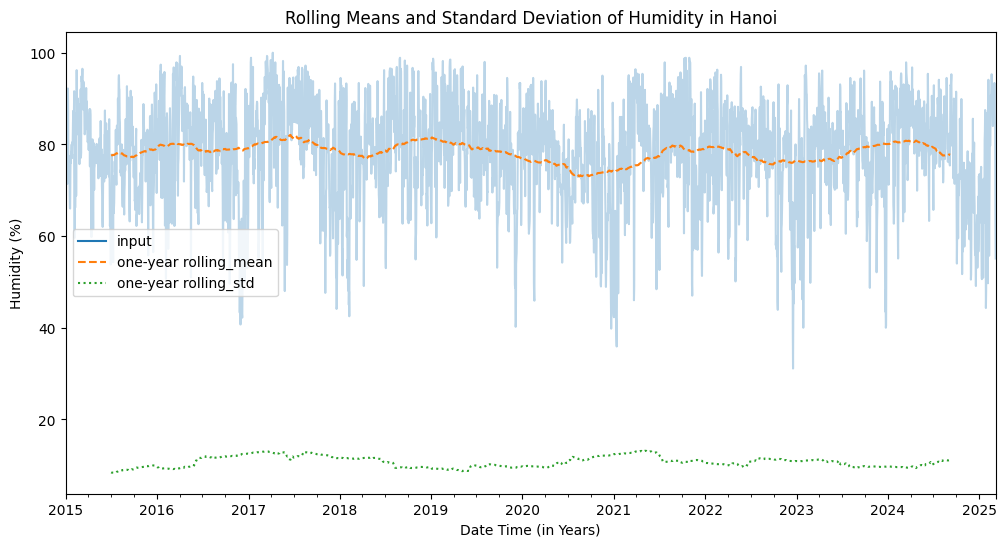

In [12]:
# Rolling Mean and Standard Deviation for Humidity in Hanoi

plt.rcParams["figure.figsize"] = [12, 6]

# Apply a rolling window of 365 days (1 year), centered
rolling = df["humidity"].rolling(365, center=True)

# Create a DataFrame with input humidity, rolling mean, and rolling standard deviation
data = pd.DataFrame({
    'input': df["humidity"],
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_std': rolling.std()
})

# Plot the data
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)  # Make input line more transparent
ax.set_title('Rolling Means and Standard Deviation of Humidity in Hanoi')
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Date Time (in Years)')

plt.show()


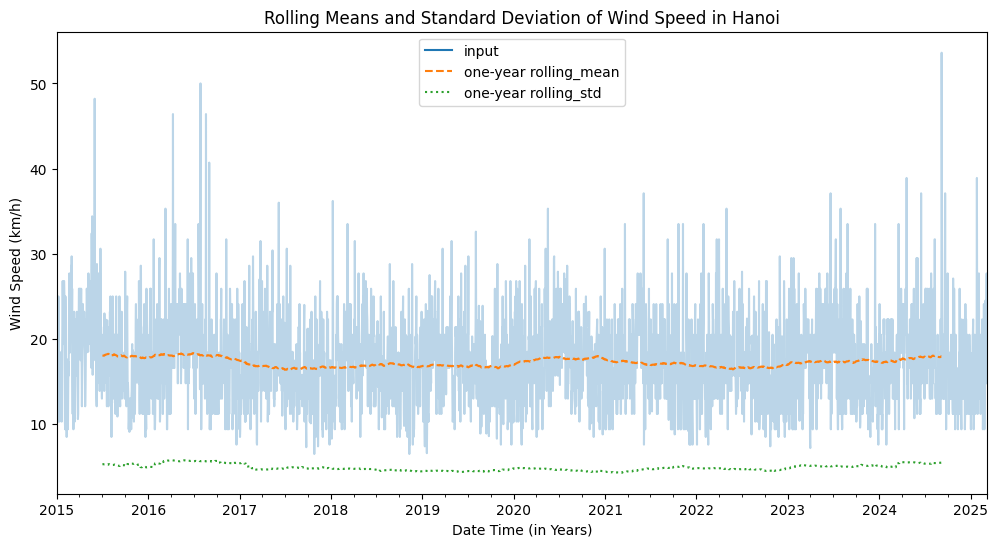

In [13]:
# Rolling Mean and Standard Deviation for Wind Speed in Hanoi

plt.rcParams["figure.figsize"] = [12, 6]

# Apply a rolling window of 365 days (1 year), centered
rolling = df["windspeed"].rolling(365, center=True)

# Create a DataFrame with input wind speed, rolling mean, and rolling standard deviation
data = pd.DataFrame({
    'input': df["windspeed"],
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_std': rolling.std()
})

# Plot the data
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)  # Make input line more transparent
ax.set_title('Rolling Means and Standard Deviation of Wind Speed in Hanoi')
ax.set_ylabel('Wind Speed (km/h)')
ax.set_xlabel('Date Time (in Years)')

plt.show()


### Deterministic vs Non deterministic Time series
Time series can be deterministic or non-deterministic in nature. Deterministic time series always behave in an expected manner where as non-deterministic time series is stochastic or random in nature. The following measure indicate is a time series is deterministic or not.

Covariance Stationary - If a time series mean, variance and covariance with past and future values do not change over time then the model is known to be covariance stationary. Time series needs to meet following three criteria to be stationary:

1. Constant Mean - Mean or expected value of a time series over successive time periods needs to be constant for a time series to be considered covariance stationary. This implies that the expected value should not be time dependent.

2. Constant Variance - Variance or standard deviation of a time series needs to be constant over time and should not be dependent on time. This is the second criteria for a time series to be covariance stationary.

3. Constant Covariance - If a covariance is not constant in a time series then the time series exhibits randomness. Additionally, time series distribution changes without any obvious pattern. This indicates that the time series time points have changing correlation.

In [14]:
# Checking for Covariance Stationarity in Temperature Time Series in Hanoi

# Get the total number of observations
size = df.shape[0]
print("Total Data Points:", size)

# Splitting the dataset into two halves for comparison
ts1 = df.iloc[:int(size/2), :]
ts2 = df.iloc[365:(int(size/2) + 365), :]  # Offset second dataset by one year

# Print the shapes of the two datasets
print("First dataset shape:", ts1.shape, "Second dataset shape:", ts2.shape)

# Compute mean and standard deviation for both datasets
mean1, std1 = ts1["temp"].mean(), ts1["temp"].std()
mean2, std2 = ts2["temp"].mean(), ts2["temp"].std()

# Compute covariance between the two datasets
covariance = ts1["temp"].cov(ts2["temp"])

# Print results
print("First dataset: mean = {}, standard deviation = {}".format(mean1, std1))
print("Second dataset: mean = {}, standard deviation = {}".format(mean2, std2))
print("Covariance between first and second dataset:", covariance)


Total Data Points: 3719
First dataset shape: (1859, 32) Second dataset shape: (1859, 32)
First dataset: mean = 24.772512103281333, standard deviation = 5.146025113787513
Second dataset: mean = 24.681979558902633, standard deviation = 5.1640225929801105
Covariance between first and second dataset: 26.02053576216005


The mean and standard deviation are relatively stable across the two datasets, indicating constant mean and variance.

The positive covariance (26.02) suggests some level of correlation between the two halves of the dataset.
Based on these measures, the temperature time series exhibits some stationarity characteristics.

### Augmented Dickey-Fuller Test
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

The results below show that test statistics is much less than the critical value for time series for all weather attributes. So we reject the null hypothesis. So the time series are stationary.

In [15]:
# Perform Augmented Dickey-Fuller Test for Stationarity on Hanoi Weather Data

from statsmodels.tsa.stattools import adfuller

def test_stationarity(df):
    """Performs Augmented Dickey-Fuller test for each column in the DataFrame."""
    print('Results of Augmented Dickey-Fuller Test:')
    
    results = []
    for col in df.columns:
        dftest = adfuller(df[col].dropna(), autolag='AIC')
        dfoutput = {
            "Feature": col,
            "Test Statistic": dftest[0],
            "p-value": dftest[1],
            "# Lags Used": dftest[2],
            "Number of Observations Used": dftest[3],
        }
        for key, value in dftest[4].items():
            dfoutput[f"Critical Value ({key})"] = value
        results.append(dfoutput)
    
    results_df = pd.DataFrame(results)
    return results_df

# Selecting only numerical time series columns
time_series_columns = ["temp", "humidity", "sealevelpressure", "windspeed"]
stationarity_results = test_stationarity(df[time_series_columns])
stationarity_results


Results of Augmented Dickey-Fuller Test:


Feature  Test Statistic       p-value  # Lags Used  \
0              temp       -3.968808  1.582944e-03           16   
1          humidity      -10.621824  5.490449e-19           13   
2  sealevelpressure       -3.881369  2.176319e-03           21   
3         windspeed       -6.924174  1.126397e-09           29   

   Number of Observations Used  Critical Value (1%)  Critical Value (5%)  \
0                         3702            -3.432118            -2.862321   
1                         3705            -3.432116            -2.862320   
2                         3697            -3.432120            -2.862322   
3                         3689            -3.432124            -2.862324   

   Critical Value (10%)  
0             -2.567186  
1             -2.567185  
2             -2.567186  
3             -2.567187

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


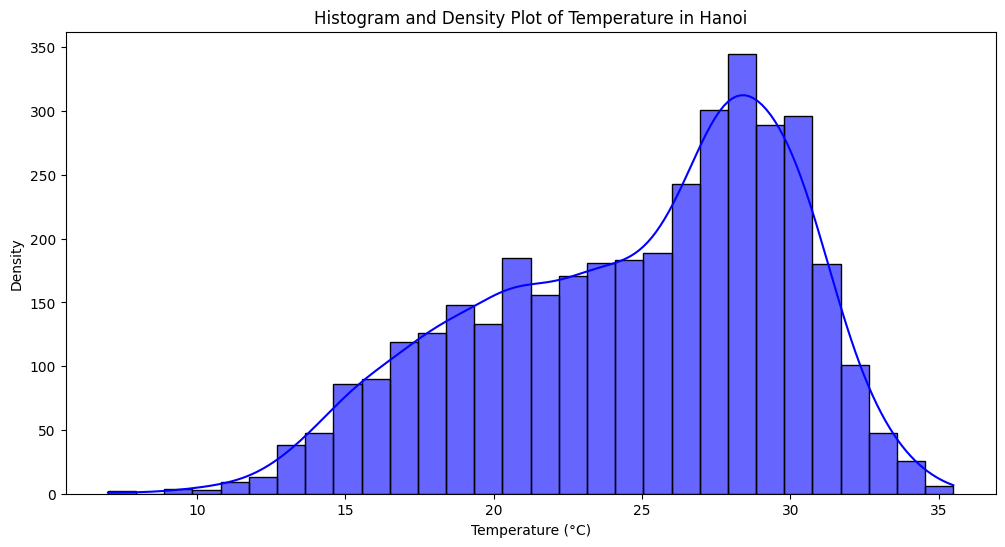

In [16]:
import seaborn as sns

# Histogram and Density Plot for Temperature in Hanoi
plt.rcParams["figure.figsize"] = [12, 6]

# Plot histogram and density plot
ax = sns.histplot(df["temp"], kde=True, bins=30, color="blue", alpha=0.6)

# Set title and labels
ax.set_title('Histogram and Density Plot of Temperature in Hanoi')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Density')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


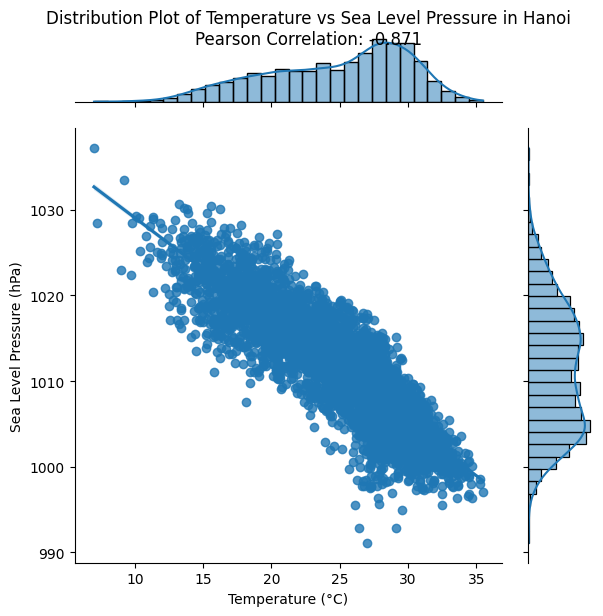

In [17]:
# Joint plot of Temperature vs Sea Level Pressure in Hanoi with Pearson correlation

import scipy.stats as stats

# Compute Pearson correlation coefficient
corr, _ = stats.pearsonr(df['temp'].dropna(), df['sealevelpressure'].dropna())

# Create joint plot with regression line
g = sns.jointplot(data=df, x='temp', y='sealevelpressure', kind='reg', space=0.4)

# Set labels and title
g.set_axis_labels('Temperature (°C)', 'Sea Level Pressure (hPa)')
plt.suptitle(f'Distribution Plot of Temperature vs Sea Level Pressure in Hanoi\nPearson Correlation: {corr:.3f}', y=1.02)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


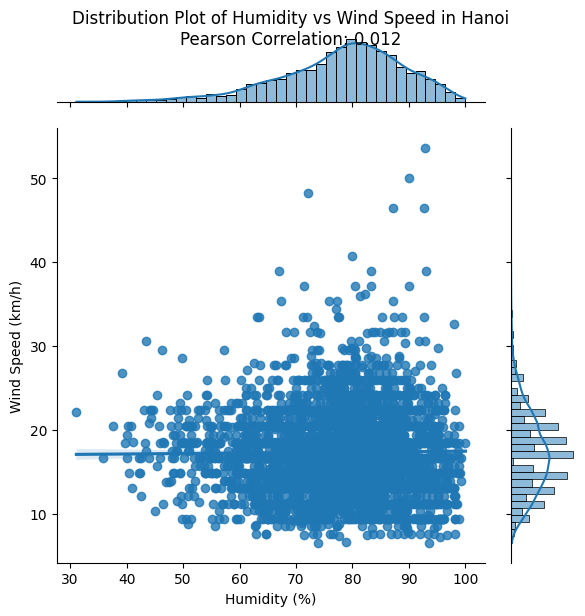

In [18]:
# Joint plot of Humidity vs Wind Speed in Hanoi with Pearson correlation

# Compute Pearson correlation coefficient
corr, _ = stats.pearsonr(df['humidity'].dropna(), df['windspeed'].dropna())

# Create joint plot with regression line
g = sns.jointplot(data=df, x='humidity', y='windspeed', kind='reg', space=0.4)

# Set labels and title
g.set_axis_labels('Humidity (%)', 'Wind Speed (km/h)')
plt.suptitle(f'Distribution Plot of Humidity vs Wind Speed in Hanoi\nPearson Correlation: {corr:.3f}', y=1.02)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


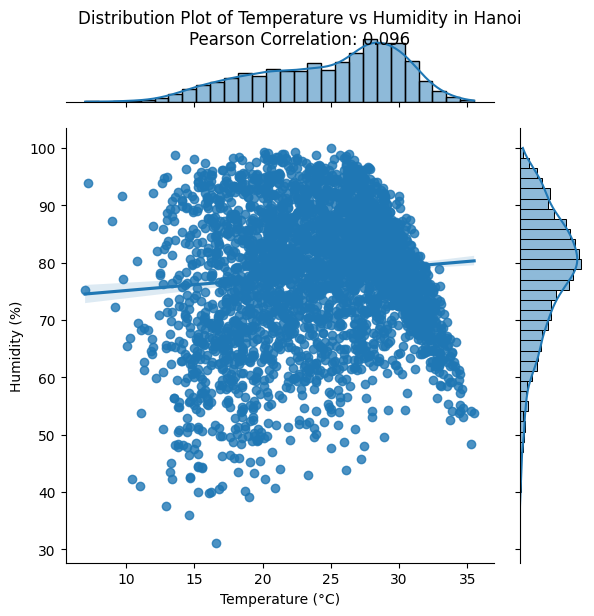

In [19]:
# Joint plot of Temperature vs Humidity in Hanoi with Pearson correlation

# Compute Pearson correlation coefficient
corr, _ = stats.pearsonr(df['temp'].dropna(), df['humidity'].dropna())

# Create joint plot with regression line
g = sns.jointplot(data=df, x='temp', y='humidity', kind='reg', space=0.4)

# Set labels and title
g.set_axis_labels('Temperature (°C)', 'Humidity (%)')
plt.suptitle(f'Distribution Plot of Temperature vs Humidity in Hanoi\nPearson Correlation: {corr:.3f}', y=1.02)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


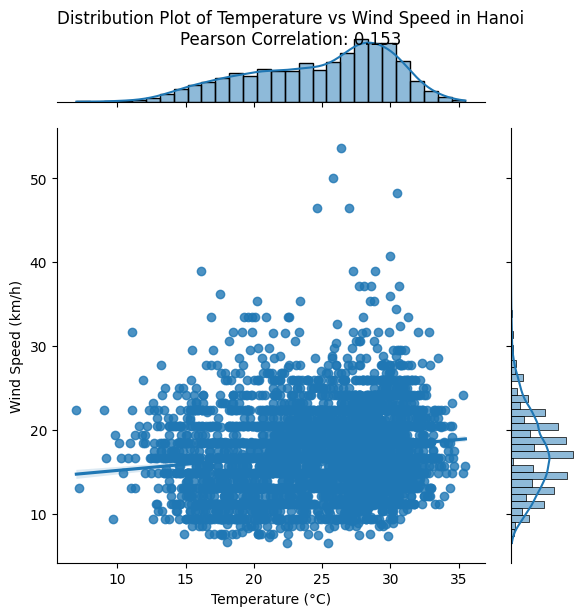

In [20]:
# Joint plot of Temperature vs Wind Speed in Hanoi with Pearson correlation

# Compute Pearson correlation coefficient
corr, _ = stats.pearsonr(df['temp'].dropna(), df['windspeed'].dropna())

# Create joint plot with regression line
g = sns.jointplot(data=df, x='temp', y='windspeed', kind='reg', space=0.4)

# Set labels and title
g.set_axis_labels('Temperature (°C)', 'Wind Speed (km/h)')
plt.suptitle(f'Distribution Plot of Temperature vs Wind Speed in Hanoi\nPearson Correlation: {corr:.3f}', y=1.02)

plt.show()


### Seasonal Decomposition
Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data. The plots below clearly show that there is an yearly (long term) trend. Also there is constant seasonality. The residuals seem random with zero mean which makes it a white noise. These can be used to understand the structure of our time-series. The intuition behind time-series decomposition is important, as many forecasting methods build upon this concept of structured decomposition to produce forecasts.

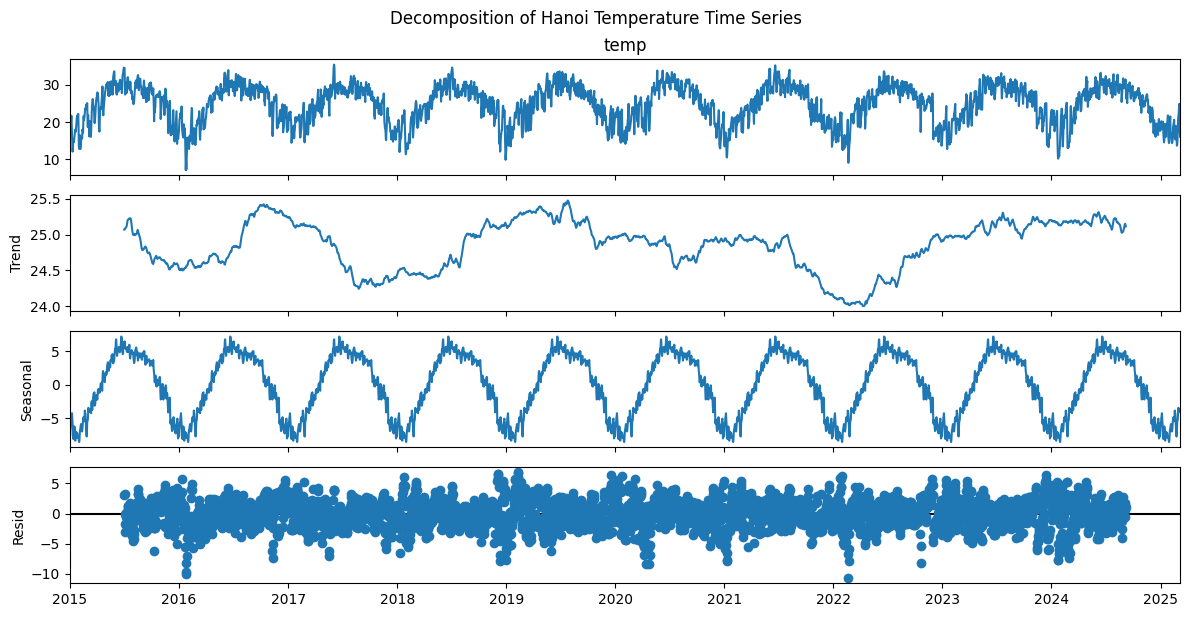

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure datetime index for time-series decomposition
df.index = pd.to_datetime(df.index)

# Decomposition of Hanoi Temperature Time Series
result = seasonal_decompose(df['temp'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.suptitle('Decomposition of Hanoi Temperature Time Series', y=1.02)
plt.show()


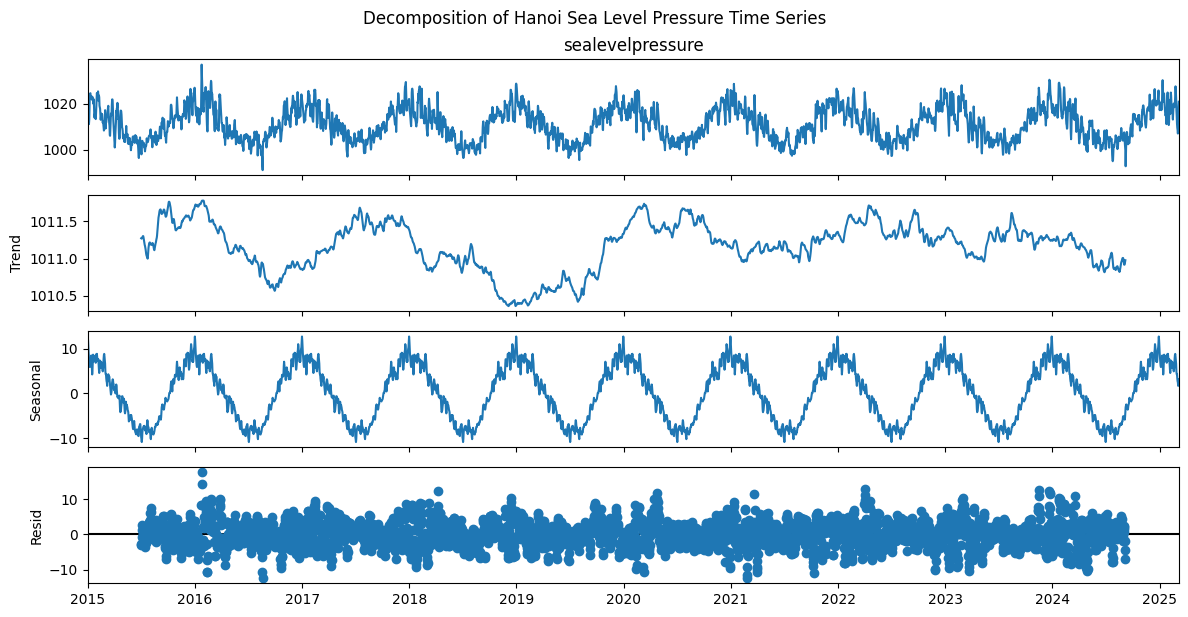

In [23]:
# Re-attempting seasonal decomposition for Sea Level Pressure in Hanoi
result = seasonal_decompose(df['sealevelpressure'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.suptitle('Decomposition of Hanoi Sea Level Pressure Time Series', y=1.02)
plt.show()

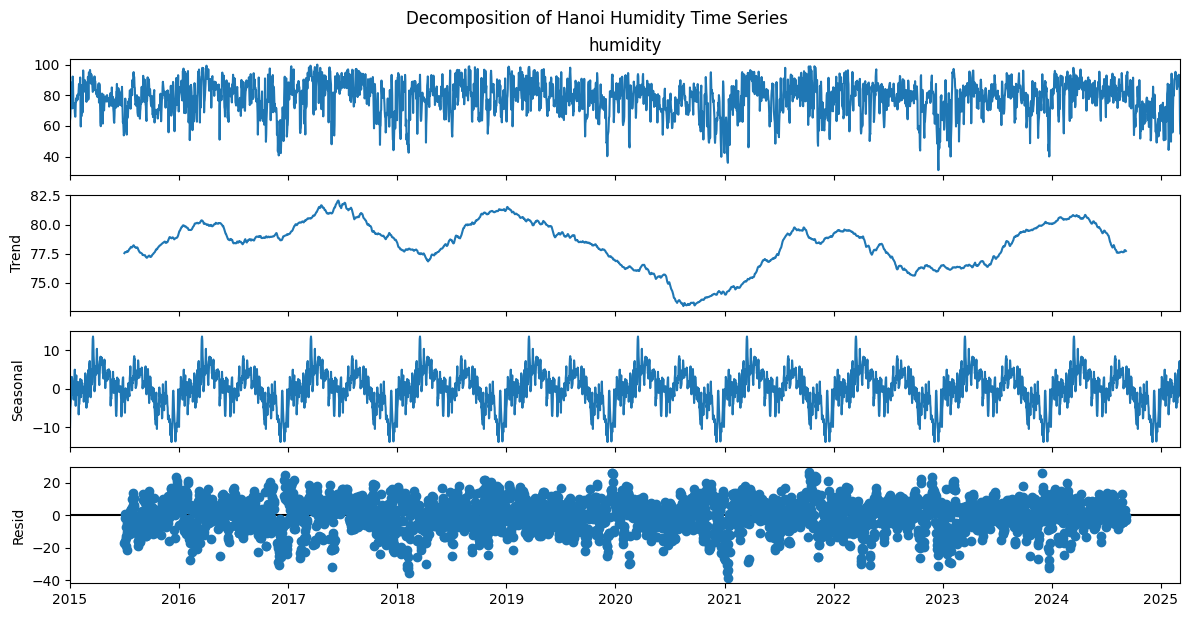

In [24]:
# Re-attempting seasonal decomposition for Sea Level Pressure in Hanoi
result = seasonal_decompose(df['humidity'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.suptitle('Decomposition of Hanoi Humidity Time Series', y=1.02)
plt.show()

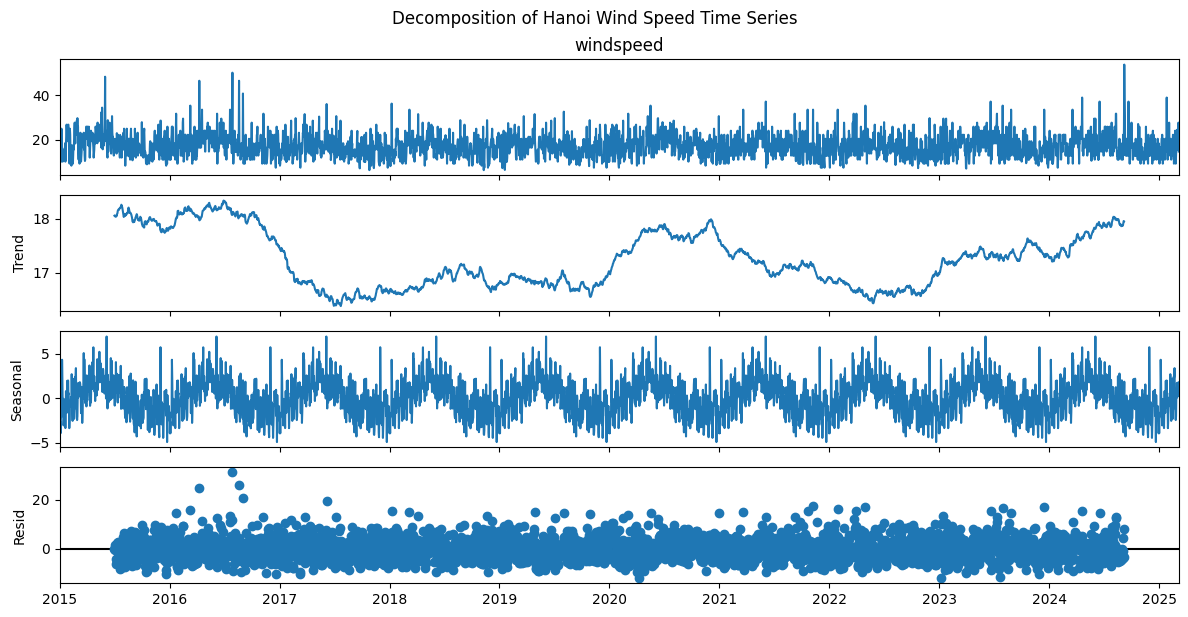

In [25]:
# Re-attempting seasonal decomposition for Sea Level Pressure in Hanoi
result = seasonal_decompose(df['windspeed'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.suptitle('Decomposition of Hanoi Wind Speed Time Series', y=1.02)
plt.show()

### lag_plot
A lag plot is a scatter plot for a time series and the same data lagged. With such a plot, we can check whether there is a possible correlation between current value and the lagged value.

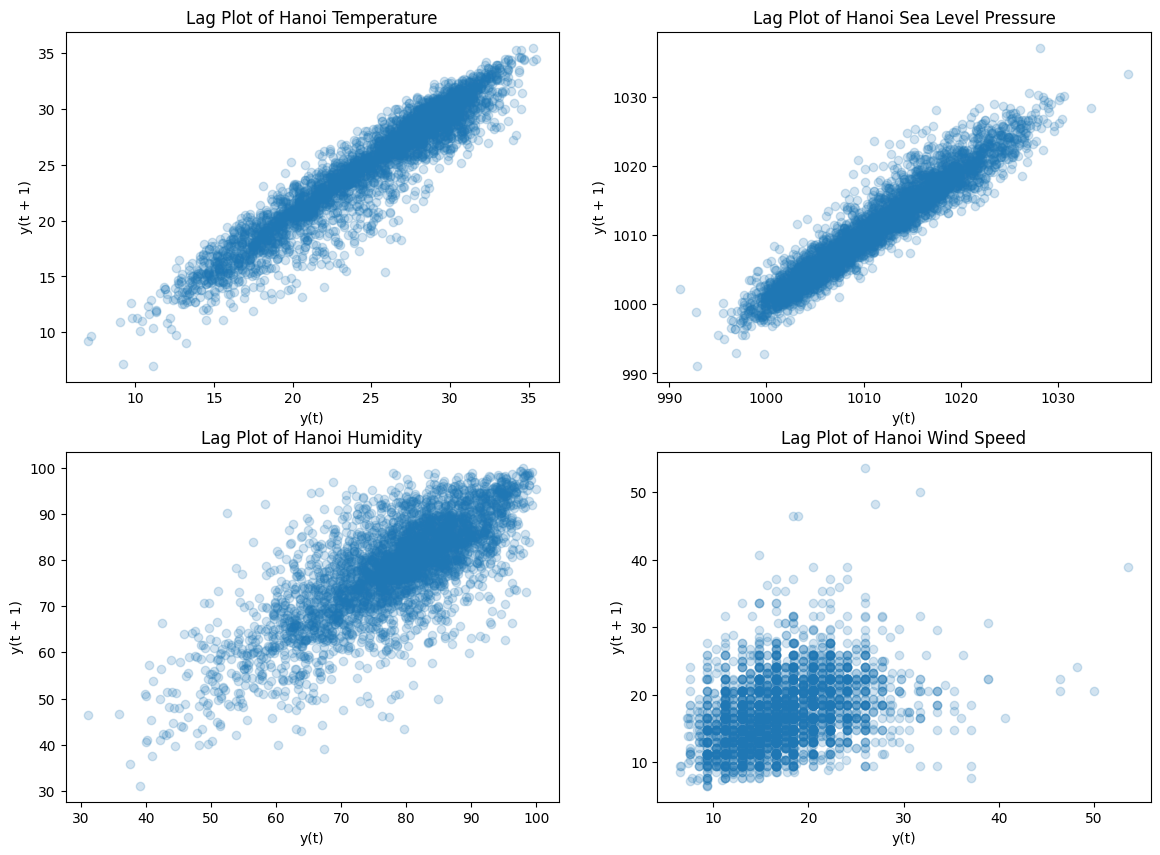

In [26]:
# Lag plot for Hanoi Weather Data
plt.rcParams["figure.figsize"] = [14, 10]
f, axes = plt.subplots(2, 2, sharex=False, sharey=False)

lag = 1

pd.plotting.lag_plot(df["temp"], alpha=0.2, lag=lag, ax=axes[0, 0])
axes[0, 0].set_title('Lag Plot of Hanoi Temperature')

pd.plotting.lag_plot(df["sealevelpressure"], alpha=0.2, lag=lag, ax=axes[0, 1])
axes[0, 1].set_title('Lag Plot of Hanoi Sea Level Pressure')

pd.plotting.lag_plot(df["humidity"], alpha=0.2, lag=lag, ax=axes[1, 0])
axes[1, 0].set_title('Lag Plot of Hanoi Humidity')

pd.plotting.lag_plot(df["windspeed"], alpha=0.2, lag=lag, ax=axes[1, 1])
axes[1, 1].set_title('Lag Plot of Hanoi Wind Speed')

plt.show()



Following observations can be made from the above plot.

1. A linear shape shows a relatively strong positive correlation between observations and their lag1 values.
2. Also it suggests that an autoregressive model is probably a better choice.
3. Outliers are easily discernible on a lag plot. The following plot shows that there are several outliers.

### Auto Correlation Factor Plot
We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

ACF Plot or Auto Correlation Factor Plot is generally used in analyzing the raw data for the purpose of fitting the Time Series Forecasting Models. ACF is used in tandem with PACF(Partial Auto Correlation Factor) to identify which Time series forecasting model to be used.

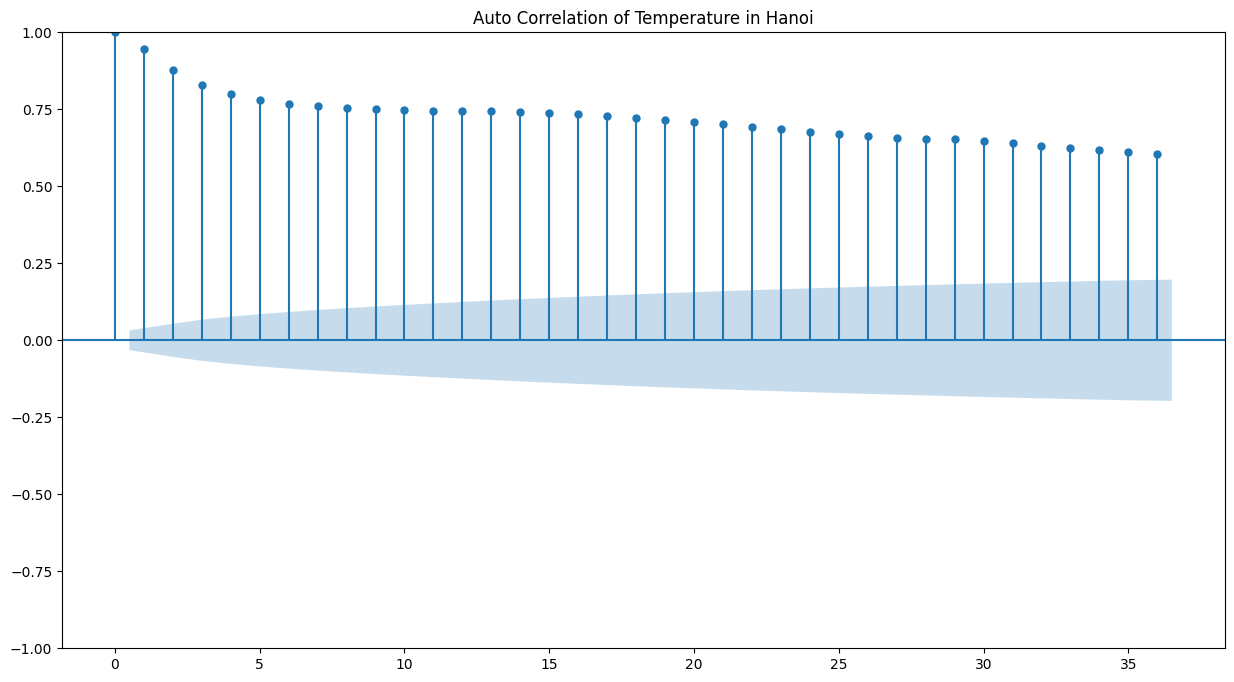

In [27]:
# Import necessary library for autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation of Temperature in Hanoi
plt.rcParams["figure.figsize"] = [15, 8]
plot_acf(df["temp"], title="Auto Correlation of Temperature in Hanoi")

# Show the plot
plt.show()


The above plot shows the lag value along the x-axis and the correlation on the y-axis between 0 and 1. Confidence intervals are drawn as a shaded cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke. The below plot shows the with a smaller lag value. 

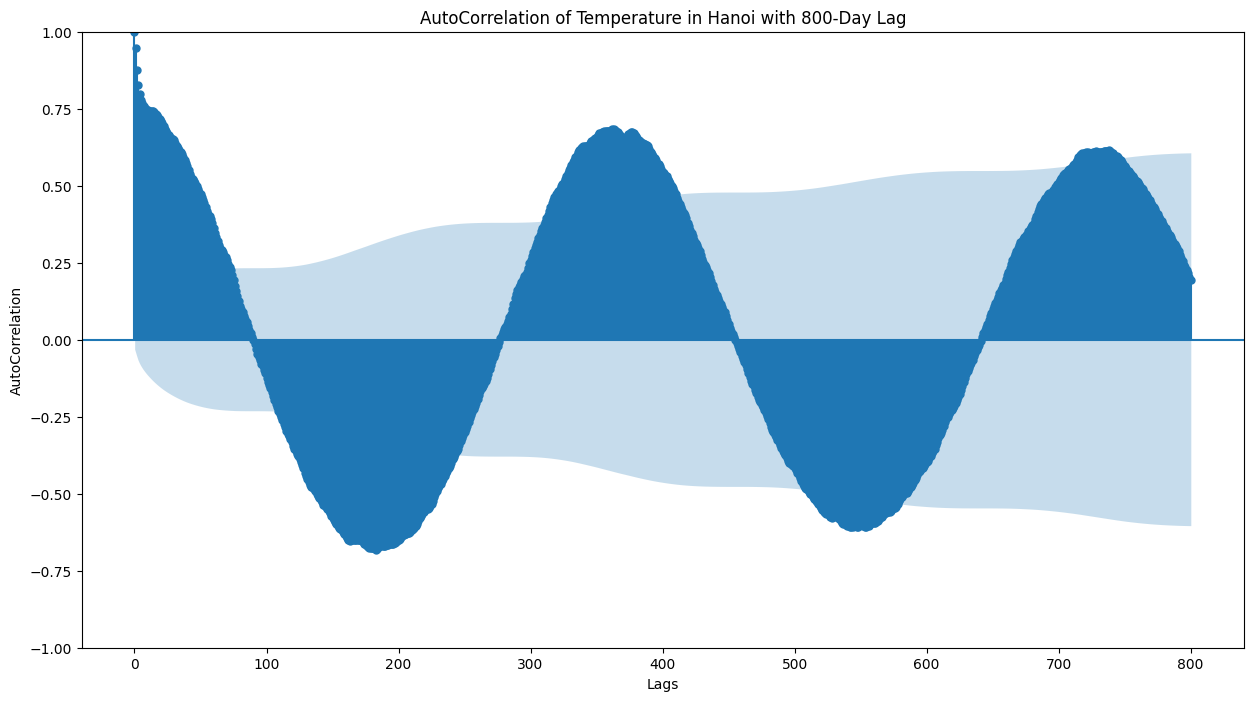

In [28]:
# Autocorrelation of Temperature in Hanoi with 800-Day Lag Period

# Define lag period
lag = 800

# Create figure
plt.rcParams["figure.figsize"] = [15, 8]
f, ax = plt.subplots(1, 1)

# Plot autocorrelation with daily frequency and specified lag
plot_acf(df["temp"].asfreq('D'), ax=ax, lags=lag, title=f"AutoCorrelation of Temperature in Hanoi with {lag}-Day Lag")

# Set labels
ax.set_xlabel('Lags')
ax.set_ylabel('AutoCorrelation')

# Show the plot
plt.show()


The above plot shows the ACF plot for 800 days. Plot shows that the correlation value for days less than ~55 days are outside 95 % confidence interval. These values are coorelated. Also values around a year(~365 days) are outside the 95% confidence interval which shows that those values are also correlated. Values around 120-240 are also outside 95% confidence interval. Theay are also -vely correlated.

### Partial Auto Correlation Factor Plot
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags 

In the plot below all the points lie outside the confidence interval. So all the lags are statically significant.


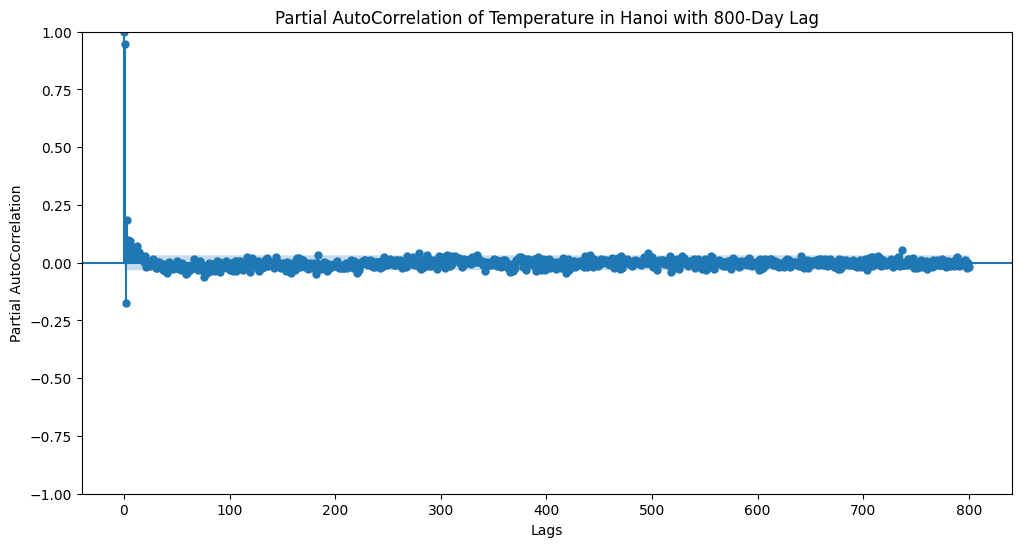

In [30]:
# Partial Autocorrelation of Temperature in Hanoi
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams["figure.figsize"] = [12, 6]
f, ax = plt.subplots(1, 1)

# Plot partial autocorrelation
plot_pacf(df['temp'], lags=lag, ax=ax, title=f"Partial AutoCorrelation of Temperature in Hanoi with {lag}-Day Lag")

# Set labels
ax.set_xlabel('Lags')
ax.set_ylabel('Partial AutoCorrelation')

# Show the plot
plt.show()

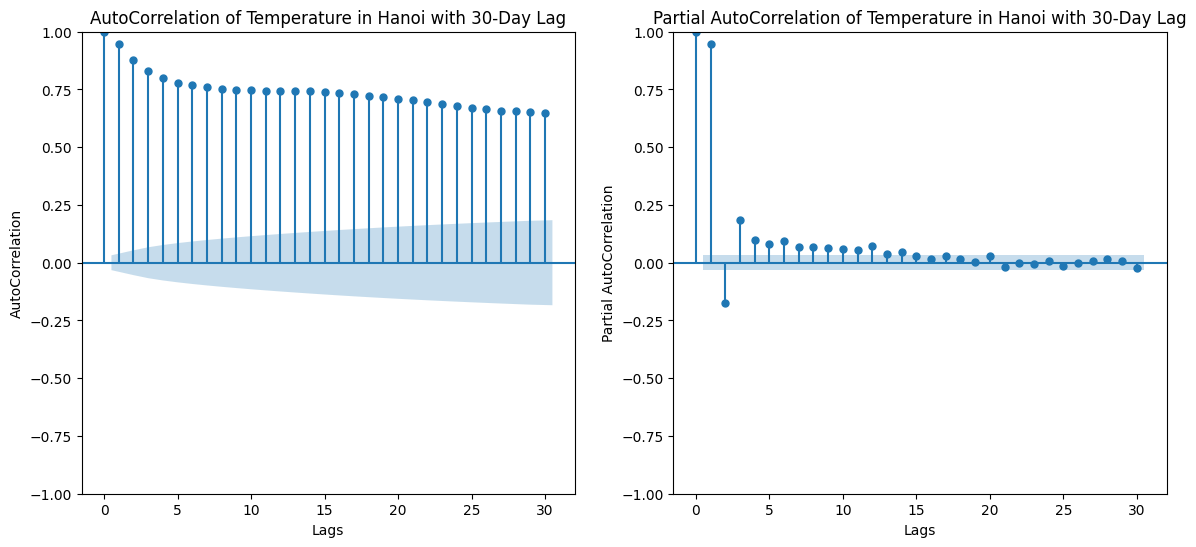

In [31]:
# Import necessary library for autocorrelation and partial autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define lag period
lag = 30

# Set figure size
plt.rcParams["figure.figsize"] = [14, 6]

# Create subplots for ACF and PACF
f, (ax0, ax1) = plt.subplots(1, 2, sharex=False, sharey=False)

# AutoCorrelation of Temperature in Hanoi
plot_acf(df["temp"], ax=ax0, lags=lag, title=f"AutoCorrelation of Temperature in Hanoi with {lag}-Day Lag")
ax0.set_xlabel('Lags')
ax0.set_ylabel('AutoCorrelation')

# Partial AutoCorrelation of Temperature in Hanoi
plot_pacf(df["temp"], lags=lag, ax=ax1, title=f"Partial AutoCorrelation of Temperature in Hanoi with {lag}-Day Lag")
ax1.set_xlabel('Lags')
ax1.set_ylabel('Partial AutoCorrelation')

# Show the plots
plt.show()


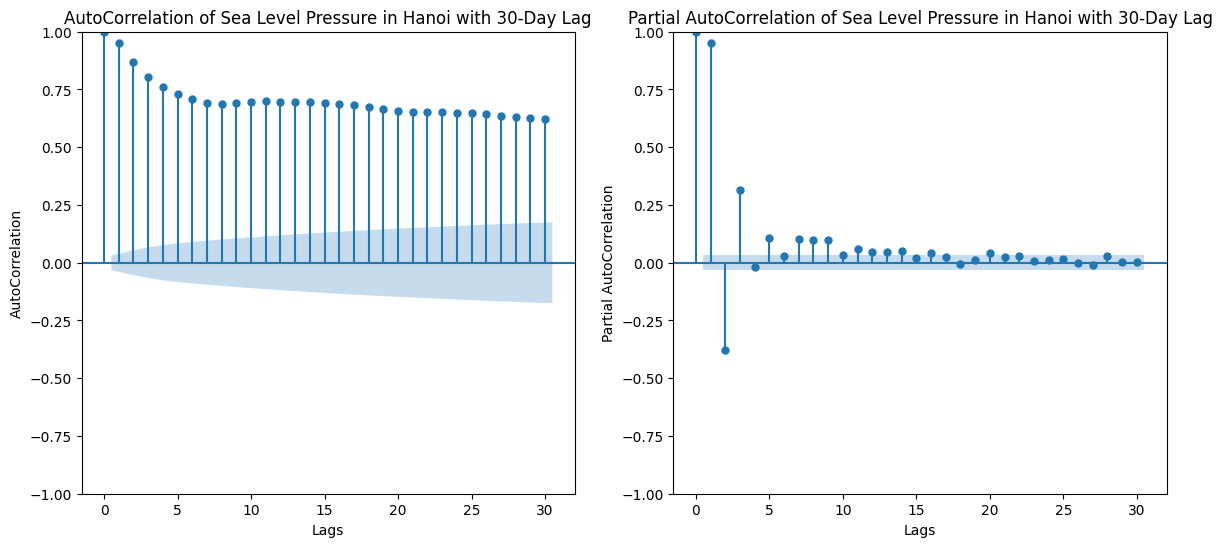

In [32]:
# Set figure size
plt.rcParams["figure.figsize"] = [14, 6]

# Create subplots for ACF and PACF
f, (ax0, ax1) = plt.subplots(1, 2, sharex=False, sharey=False)

plot_acf(df["sealevelpressure"], ax=ax0, lags=lag, title=f"AutoCorrelation of Sea Level Pressure in Hanoi with {lag}-Day Lag")
ax0.set_xlabel('Lags')
ax0.set_ylabel('AutoCorrelation')

plot_pacf(df["sealevelpressure"], lags=lag, ax=ax1, title=f"Partial AutoCorrelation of Sea Level Pressure in Hanoi with {lag}-Day Lag")
ax1.set_xlabel('Lags')
ax1.set_ylabel('Partial AutoCorrelation')

# Show the plots
plt.show()

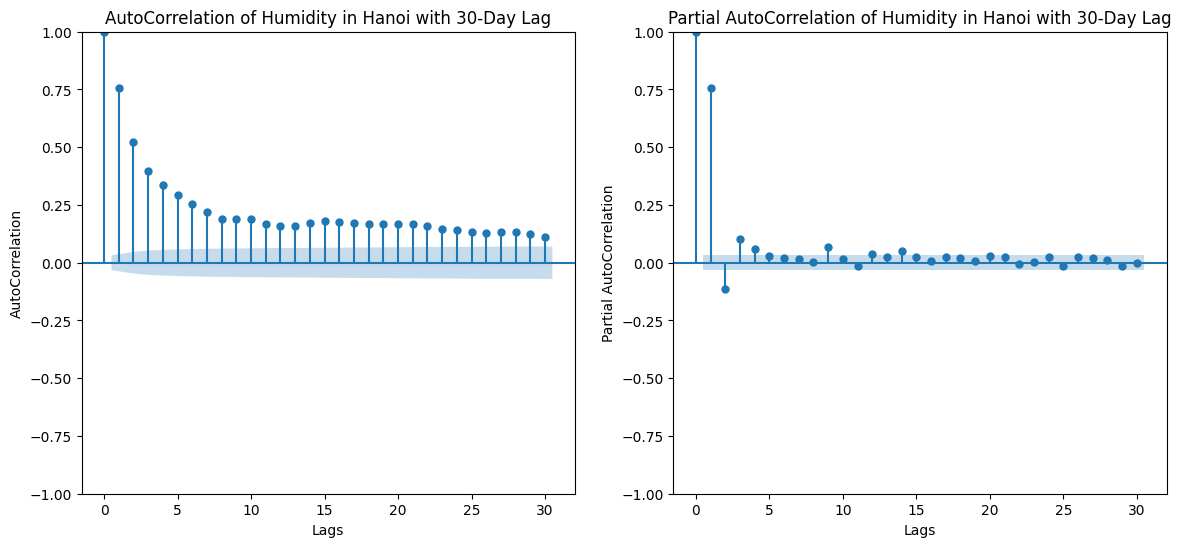

In [33]:
# Set figure size
plt.rcParams["figure.figsize"] = [14, 6]

# Create subplots for ACF and PACF
f, (ax0, ax1) = plt.subplots(1, 2, sharex=False, sharey=False)

plot_acf(df["humidity"], ax=ax0, lags=lag, title=f"AutoCorrelation of Humidity in Hanoi with {lag}-Day Lag")
ax0.set_xlabel('Lags')
ax0.set_ylabel('AutoCorrelation')

plot_pacf(df["humidity"], lags=lag, ax=ax1, title=f"Partial AutoCorrelation of Humidity in Hanoi with {lag}-Day Lag")
ax1.set_xlabel('Lags')
ax1.set_ylabel('Partial AutoCorrelation')

# Show the plots
plt.show()

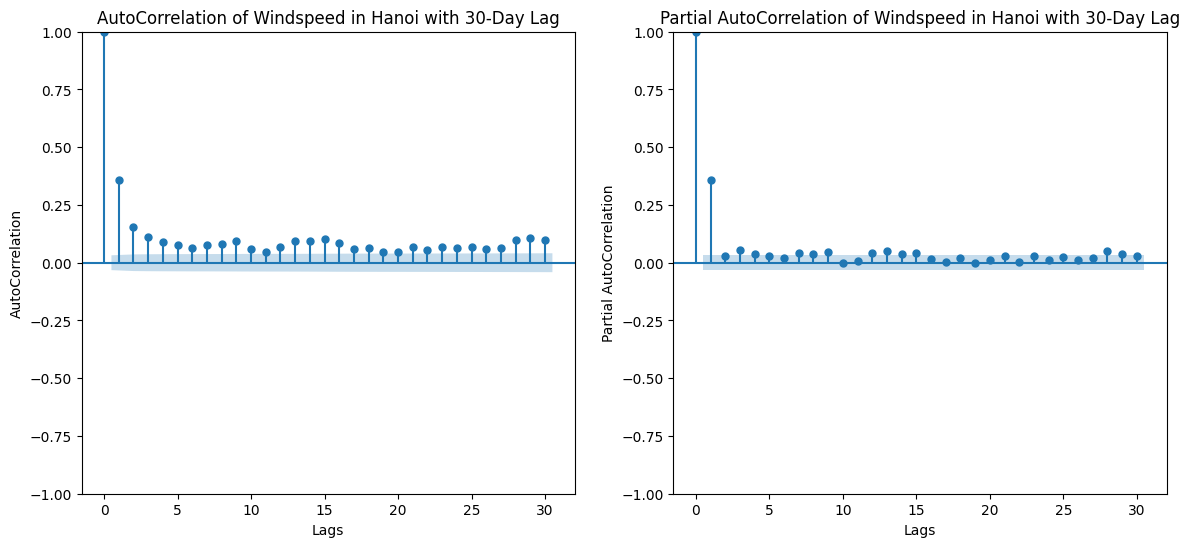

In [34]:
# Set figure size
plt.rcParams["figure.figsize"] = [14, 6]

# Create subplots for ACF and PACF
f, (ax0, ax1) = plt.subplots(1, 2, sharex=False, sharey=False)

plot_acf(df["windspeed"], ax=ax0, lags=lag, title=f"AutoCorrelation of Windspeed in Hanoi with {lag}-Day Lag")
ax0.set_xlabel('Lags')
ax0.set_ylabel('AutoCorrelation')

plot_pacf(df["windspeed"], lags=lag, ax=ax1, title=f"Partial AutoCorrelation of Windspeed in Hanoi with {lag}-Day Lag")
ax1.set_xlabel('Lags')
ax1.set_ylabel('Partial AutoCorrelation')

# Show the plots
plt.show()

### Intuition of ACF and PACF
The ACF for the AR(k) time series is strong to a lag of k and the inertia of that relationship carry on to subsequent lag values, trailing off at some point as the effect is weakened. We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there is no correlation for lag values beyond k. In the ACF plot above, The first correaltion value is strong and then it slowly becomes week in subsequent lags. In PACF plot, the correlation value become negative after 2nd value. This indicates that AR model will work on this time series with a value p = 2 for ARIMA model.

### MultiVariate Analysis
Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values.

I will use Vector Auto Regression (VAR) algorithm for multivariate weather forecast. In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.

### Johansen Cointegration Test
Cointegration is a statistical property of a collection (X1, X2, ..., Xk) of time series variables. First, all of the series must be integrated of order d (see Order of integration). Next, if a linear combination of this collection is integrated of order less than d, then the collection is said to be co-integrated.

In the Johansen test, we check whether lambda has a zero eigenvalue. When all the eigenvalues are zero, that would mean that the series are not cointegrated, whereas when some of the eigenvalues contain negative values, it would imply that a linear combination of the time series can be created, which would result in stationarity.

The results below show that 4 vectors of 4 weather attributes are co-integrated.

In [35]:
# Import necessary library for Johansen Cointegration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Selecting weather attributes for cointegration test
weather_features = ["temp", "humidity", "sealevelpressure", "windspeed"]
df_selected = df[weather_features].dropna()  # Removing NaN values

# Checking stationarity and running Johansen Cointegration Test
N, l = df_selected.shape
print("Number of Observations:", N, "Number of Variables:", l)

# Running Johansen Cointegration Test
jres = coint_johansen(df_selected, 0, 1)  # 0 = No trend, 1 = 1 lagged difference

trstat = jres.lr1  # Trace statistic
tsignf = jres.cvt  # Critical values

# Checking cointegration vectors
cointegration_vectors = 0
for i in range(l):
    if trstat[i] > tsignf[i, 1]:  # 95% significance level
        cointegration_vectors = i + 1
        jres.r = cointegration_vectors
        jres.evecr = jres.evec[:, :cointegration_vectors]
        print(f"Variable {i} is cointegrated")

# Displaying results
print(f"\nThere are {jres.r} cointegration vectors")
print("\nEigen Vectors:\n", jres.evecr)
print("\nEigen Values:\n", jres.eig)
print("\nT-Statistics:\n", jres.lr1)
print("\nEigen Statistics:\n", jres.lr2)


Number of Observations: 3719 Number of Variables: 4
Variable 0 is cointegrated
Variable 1 is cointegrated
Variable 2 is cointegrated
Variable 3 is cointegrated

There are 4 cointegration vectors

Eigen Vectors:
 [[ 0.00711998  0.14257411 -0.3837558   0.16630168]
 [-0.01168915 -0.08178576 -0.07303749  0.00324331]
 [ 0.03554655  0.08415202 -0.32345241 -0.0234753 ]
 [ 0.2734683  -0.03444465 -0.023442   -0.00135032]]

Eigen Values:
 [0.22523867 0.13115564 0.11277675 0.03493507]

T-Statistics:
 [2048.10441441 1099.52504304  576.94726794  132.17612098]

Eigen Statistics:
 [948.57937137 522.5777751  444.77114696 132.17612098]
